In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

2023-04-26 11:17:21.069725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 11:17:23.651673: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-04-26 11:17:23.651930: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-04-26 11:17:23.651942: W tensorflow/compiler/tf

In [2]:
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [6]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

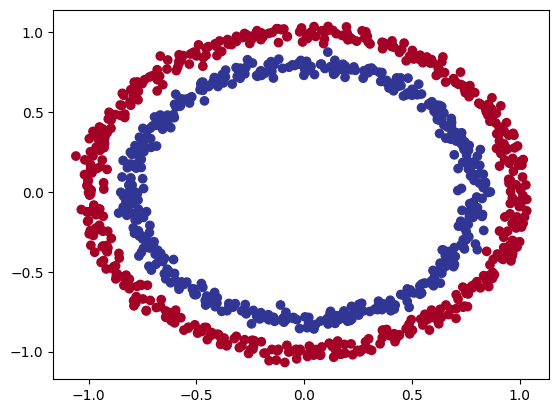

In [7]:
plt.scatter(circles["X0"],circles["X1"],c=y,cmap=plt.cm.RdYlBu)

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
len(X),len(y)

(1000, 1000)

In [10]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model.fit(X,y,epochs=100)

2023-04-26 11:17:31.754804: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-26 11:17:31.975676: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-26 11:17:31.975880: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-26 11:17:31.976767: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Epoch 1/100


2023-04-26 11:17:41.298156: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f9bfc719370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-26 11:17:41.298193: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5


32/32 [==============================] - 6s 1ms/step - loss: 2.2501 - accuracy: 0.4910
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7174 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7026 - accuracy: 0.4990
Epoch 4/100
 1/32 [..............................] - ETA: 0s - loss: 0.6917 - accuracy: 0.5000

2023-04-26 11:17:41.543333: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.4990
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5080
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5020
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4830
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4630
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4800
Epoch 13/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4800
Epoch 14/100
32/32

In [11]:
tf.random.set_seed(42)

model1=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model1.fit(X,y,epochs=100,verbose=0)

2023-04-26 11:17:47.565824: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


In [12]:
model1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5040


[0.6949852108955383, 0.5040000081062317]

In [13]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is >   (greater than) 1, it's multi-class 
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 984us/step
doing binary classifcation...


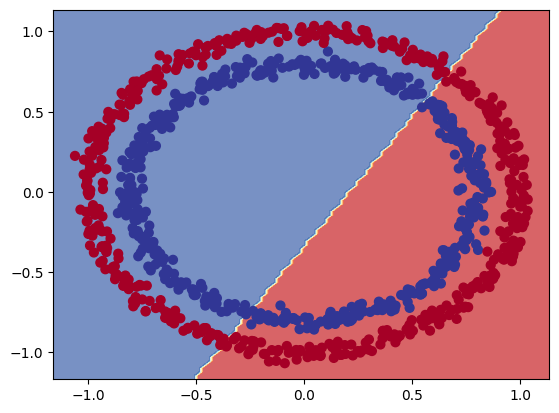

In [14]:
plot_decision_boundary(model1,X,y)

In [15]:
tf.random.set_seed(42)

model2=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(2,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
               metrics=["accuracy"])

history=model2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5040
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5030
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5030
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5050
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5040
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5090
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5160
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5150
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5120
Epoch 11/

In [16]:
model2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6317 - accuracy: 0.5900


[0.6316987872123718, 0.5899999737739563]

313/313 [==============================] - 0s 731us/step
doing binary classifcation...


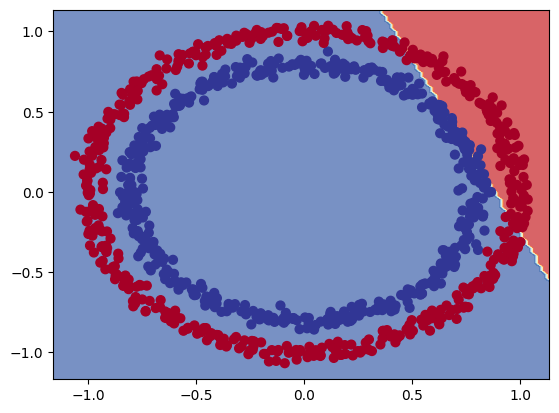

In [17]:
plot_decision_boundary(model2,X,y)

In [18]:
X_train,y_train,X_test,y_test=X[:800],y[:800],X[800:],y[800:]
X_train.shape,X_test.shape

((800, 2), (200, 2))

In [19]:
tf.random.set_seed(42)

#Same as model2
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(2,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
               metrics=["accuracy"])

history=model3.fit(X_train,y_train,epochs=250)

Epoch 1/250
25/25 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5188
Epoch 2/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5312
Epoch 3/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5300
Epoch 4/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5625
Epoch 5/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5813
Epoch 6/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5550
Epoch 7/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5512
Epoch 8/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5612
Epoch 9/250
25/25 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.5725
Epoch 10/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5663
Epoch 11/

In [20]:
model3.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0612 - accuracy: 0.9900


[0.061234183609485626, 0.9900000095367432]

313/313 [==============================] - 0s 748us/step
doing binary classifcation...


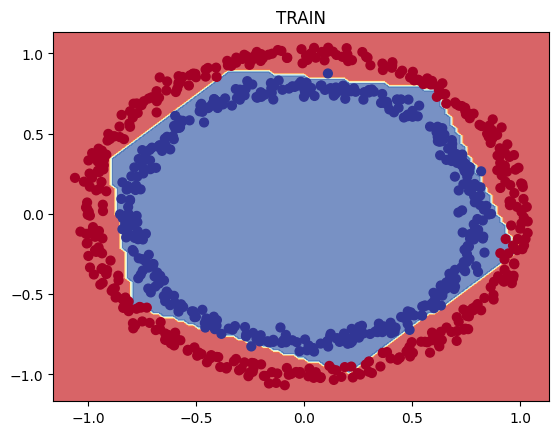

In [21]:
plt.title("TRAIN")
plot_decision_boundary(model3,X_train,y_train)

313/313 [==============================] - 0s 772us/step
doing binary classifcation...


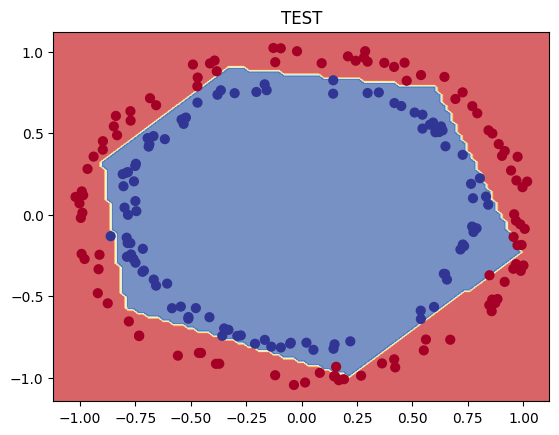

In [22]:
plt.title("TEST")
plot_decision_boundary(model3,X_test,y_test)
plt.show()

In [23]:
history=pd.DataFrame(history.history)
history.head()

,loss,accuracy
0,0.689146,0.51875
1,0.688142,0.53125
2,0.687178,0.53000
3,0.686125,0.56250
4,0.685317,0.58125


Text(0.5, 0, 'Epochs')

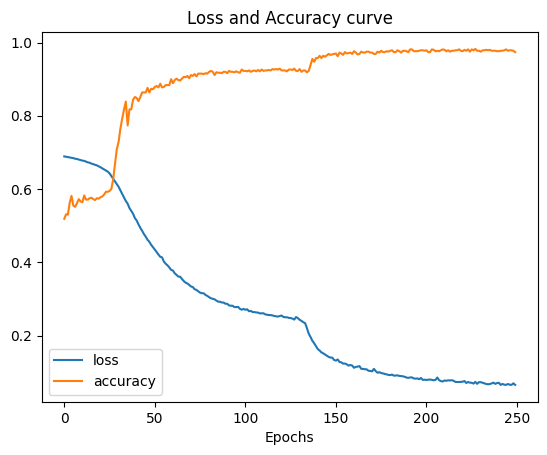

In [24]:
history.plot()
plt.title("Loss and Accuracy curve")
plt.xlabel("Epochs")

In [25]:
tf.random.set_seed(42)

#Same as model3
model4=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(2,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer="Adam",
               metrics=["accuracy"])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10 **(epoch/20)) 

history2=model4.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.5113 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5200 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5200 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5213 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5213 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5213 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5200 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5200 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='Epochs'>

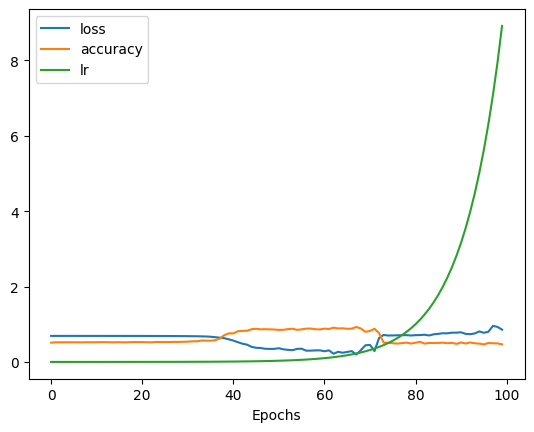

In [26]:
pd.DataFrame(history2.history).plot(xlabel="Epochs")

Text(0.5, 1.0, 'Learning Rate v/s Loss')

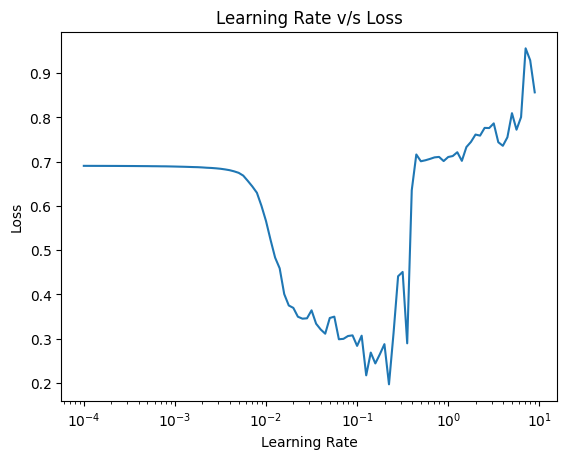

In [27]:
lrs=1e-4 * 10 **(tf.range(100)/20)
plt.semilogx(lrs,history2.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate v/s Loss")

#Ideal learning rate is between where the loss is lowest and 10 times smaller

In [35]:
tf.random.set_seed(42)

#Same as model3
model5=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(2,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

history3=model5.fit(X_train,y_train,epochs=50) 
#Model is having similar performance with lesser epochs and higher learning rate

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6988 - accuracy: 0.4675
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5050
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5200
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5713
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5775
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.5612
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.6112
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.6025
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6263
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.6538
Epoch 11/50
25/25 [

In [36]:
model5.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0881 - accuracy: 0.9800


[0.08811426162719727, 0.9800000190734863]

313/313 [==============================] - 0s 876us/step
doing binary classifcation...


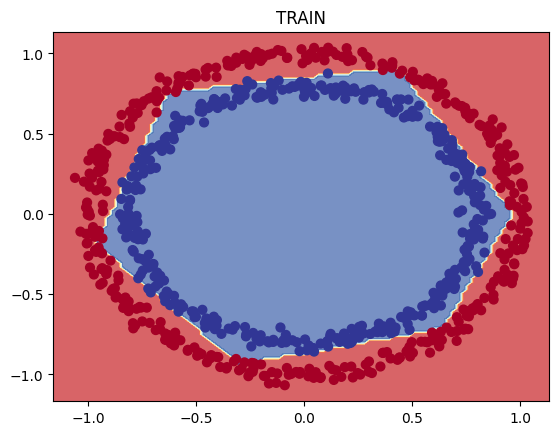

In [37]:
plt.title("TRAIN")
plot_decision_boundary(model5,X_train,y_train)

313/313 [==============================] - 0s 961us/step
doing binary classifcation...


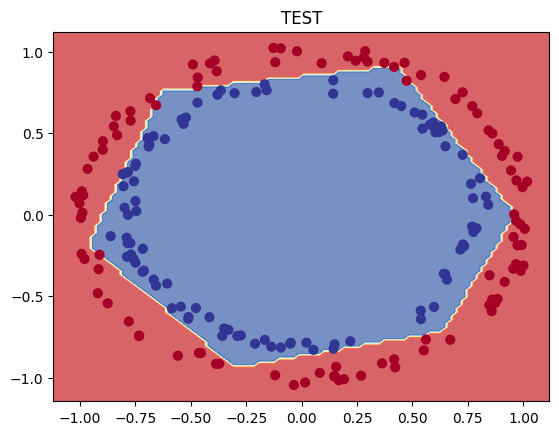

In [38]:
plt.title("TEST")
plot_decision_boundary(model5,X_test,y_test)
plt.show()

In [39]:
y_pred=model5.predict(X_test)
y_pred=tf.round(y_pred)
y_pred

7/7 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
 

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       101
           1       0.96      1.00      0.98        99

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [124]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test,y_pred,figsize=(5,5)):
  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)
  

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

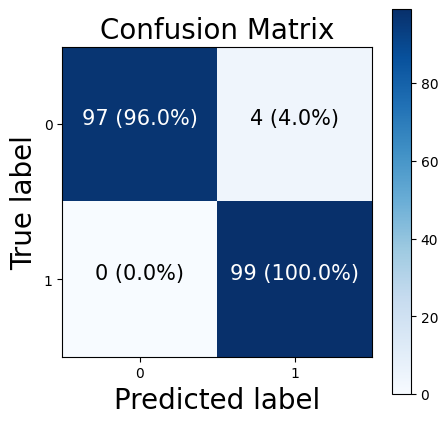

In [125]:
plot_confusion_matrix(y_test,y_pred)

# **MULTICLASS CLASSIFICATION**

In [43]:
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels), (test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [44]:
train_data[0],train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

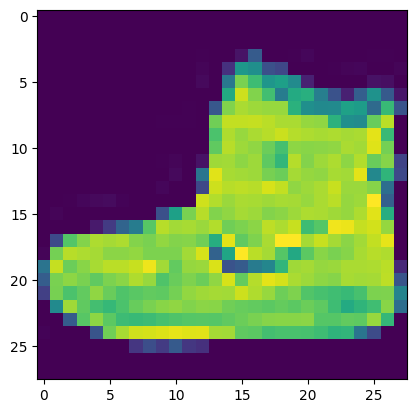

In [45]:
plt.imshow(train_data[0])

In [46]:
class_names=["T-Shirt","Pullover","Trouser","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]
len(class_names)

10

Coat


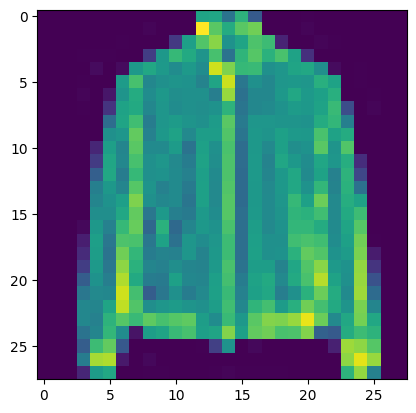

In [47]:
plt.imshow(train_data[68])
print(class_names[train_labels[68]])

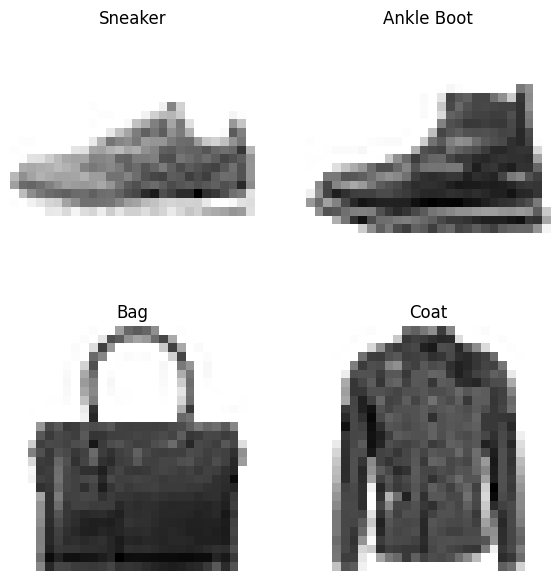

In [51]:
import random

plt.figure(figsize=(7,7))
for i in range(4):
    ax=plt.subplot(2,2,i+1)
    rand_ind=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_ind],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_ind]])
    plt.axis(False)

In [52]:
train_data[0].shape #Input Shape

(28, 28)

In [53]:
len(class_names) #Output Shape

10

In [64]:
tf.random.set_seed(42)

multi_model1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#If the labels are one hot encode use CategoricalCrossentropy() otherwise use SparseCategoricalCrossentropy()

multi_model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

multi_history=multi_model1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3144 - accuracy: 0.1635 - val_loss: 2.0830 - val_accuracy: 0.1837
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.0619 - accuracy: 0.1867 - val_loss: 2.0450 - val_accuracy: 0.1909
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0300 - accuracy: 0.1935 - val_loss: 2.0214 - val_accuracy: 0.1939
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7103 - accuracy: 0.2917 - val_loss: 1.5737 - val_accuracy: 0.2980
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5256 - accuracy: 0.3291 - val_loss: 1.5027 - val_accuracy: 0.3170
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4803 - accuracy: 0.3354 - val_loss: 1.5282 - val_accuracy: 0.2790
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4553 - accuracy: 0.3442 - val_loss: 1.4562 - val_accuracy:

In [65]:
multi_model1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 4)                 3140      
                                                                 
 dense_50 (Dense)            (None, 4)                 20        
                                                                 
 dense_51 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [66]:
train_data.min(),train_data.max()

(0, 255)

In [71]:
train_data_scaled=train_data/(train_data.max()-train_data.min())
test_data_scaled=test_data/(test_data.max()-test_data.min())

In [72]:
train_data_scaled.min(),train_data_scaled.max()

(0.0, 1.0)

In [77]:
tf.random.set_seed(42)

multi_model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

#Neural Networks prefers numerical and scaled data (between 0 & 1)

multi_model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

multi_history2=multi_model2.fit(train_data_scaled,train_labels,epochs=10,validation_data=(test_data_scaled,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2497 - accuracy: 0.5849 - val_loss: 0.9062 - val_accuracy: 0.7203
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7773 - accuracy: 0.7594 - val_loss: 0.7244 - val_accuracy: 0.7695
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6716 - accuracy: 0.7841 - val_loss: 0.6687 - val_accuracy: 0.7823
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6309 - accuracy: 0.7933 - val_loss: 0.6424 - val_accuracy: 0.7919
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6098 - accuracy: 0.7982 - val_loss: 0.6348 - val_accuracy: 0.7936
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5942 - accuracy: 0.8017 - val_loss: 0.6267 - val_accuracy: 0.7923
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5866 - accuracy: 0.8038 - val_loss: 0.6107 - val_accuracy:

Text(0.5, 0, 'Epochs')

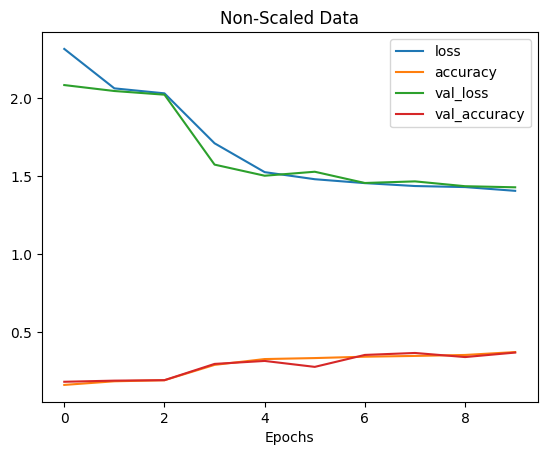

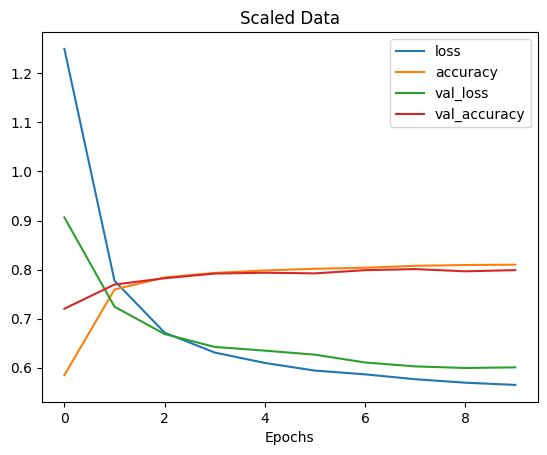

In [87]:
multi_history_df=pd.DataFrame(multi_history.history)
multi_history_df.plot(title="Non-Scaled Data")
plt.xlabel("Epochs")
multi_history_df2=pd.DataFrame(multi_history2.history)
multi_history_df2.plot(title="Scaled Data")
plt.xlabel("Epochs")

In [93]:
tf.random.set_seed(42)

multi_model3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

multi_model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10 **(epoch/20)) 

multi_history3=multi_model3.fit(train_data_scaled,train_labels,epochs=40,
                                validation_data=(test_data_scaled,test_labels),
                                callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3352 - accuracy: 0.4893 - val_loss: 0.9779 - val_accuracy: 0.6368 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8833 - accuracy: 0.6739 - val_loss: 0.8534 - val_accuracy: 0.6826 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7744 - accuracy: 0.7088 - val_loss: 0.7744 - val_accuracy: 0.7108 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7413 - accuracy: 0.7197 - val_loss: 0.7551 - val_accuracy: 0.7189 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7216 - accuracy: 0.7266 - val_loss: 0.7376 - val_accuracy: 0.7249 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7053 - accuracy: 0.7313 - val_loss: 0.7588 - val_accuracy: 0.7141 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

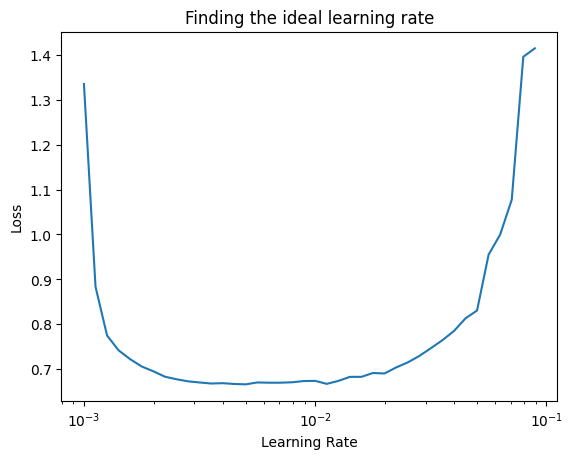

In [94]:
lrs=1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,multi_history3.history["loss"])
plt.ylabel("Loss")
plt.xlabel("Learning Rate")
plt.title("Finding the ideal learning rate")

In [99]:
tf.random.set_seed(42)

multi_model4=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

multi_model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     metrics=["accuracy"]) 

multi_history3=multi_model4.fit(train_data_scaled,train_labels,epochs=40,
                                validation_data=(test_data_scaled,test_labels))

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1675 - accuracy: 0.5459 - val_loss: 0.8255 - val_accuracy: 0.7118
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7739 - accuracy: 0.7237 - val_loss: 0.7515 - val_accuracy: 0.7350
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7140 - accuracy: 0.7451 - val_loss: 0.7105 - val_accuracy: 0.7489
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6832 - accuracy: 0.7552 - val_loss: 0.6956 - val_accuracy: 0.7498
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6631 - accuracy: 0.7629 - val_loss: 0.6732 - val_accuracy: 0.7622
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6471 - accuracy: 0.7678 - val_loss: 0.6776 - val_accuracy: 0.7592
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6360 - accuracy: 0.7727 - val_loss: 0.6619 - val_accuracy:

In [105]:
y_pred2=multi_model4.predict(test_data_scaled)
y_pred2

313/313 [==============================] - 0s 701us/step


array([[8.7672724e-08, 7.0041178e-12, 4.9804834e-07, ..., 4.7136717e-02,
        2.2259939e-03, 4.0933940e-01],
       [1.9916312e-03, 1.1012390e-07, 8.1681877e-01, ..., 0.0000000e+00,
        2.4334588e-06, 2.8499647e-31],
       [2.9471869e-04, 9.9913603e-01, 4.1295880e-05, ..., 2.0670334e-29,
        8.0712204e-14, 2.3227690e-22],
       ...,
       [1.9360879e-02, 3.4826306e-07, 6.9360988e-04, ..., 3.8218925e-12,
        8.6719108e-01, 5.0560150e-08],
       [2.4822593e-04, 9.7473562e-01, 2.6152554e-04, ..., 9.2814835e-19,
        5.3955122e-12, 6.1083349e-15],
       [5.7142544e-05, 6.2218644e-09, 2.0430234e-05, ..., 2.4124053e-04,
        3.1947721e-02, 1.7145226e-03]], dtype=float32)

In [107]:
y_pred2[0],tf.argmax(y_pred2[0])

(array([8.7672724e-08, 7.0041178e-12, 4.9804834e-07, 4.9765972e-06,
        7.5361517e-05, 5.4119700e-01, 2.0034813e-05, 4.7136717e-02,
        2.2259939e-03, 4.0933940e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=5>)

Predicted label:Ankle Boot


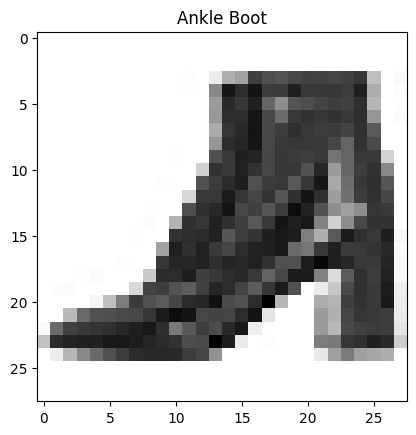

In [158]:
ind_choice=random.randint(0,len(test_data))
plt.imshow(test_data[ind_choice],cmap=plt.cm.binary)
plt.title(class_names[test_labels[ind_choice]])
print(f"Predicted label:{class_names[tf.argmax(y_pred2[ind_choice])]}")

In [116]:
ypred_labelled=y_pred2.argmax(axis=1)
ypred_labelled

array([5, 2, 1, ..., 8, 1, 5])

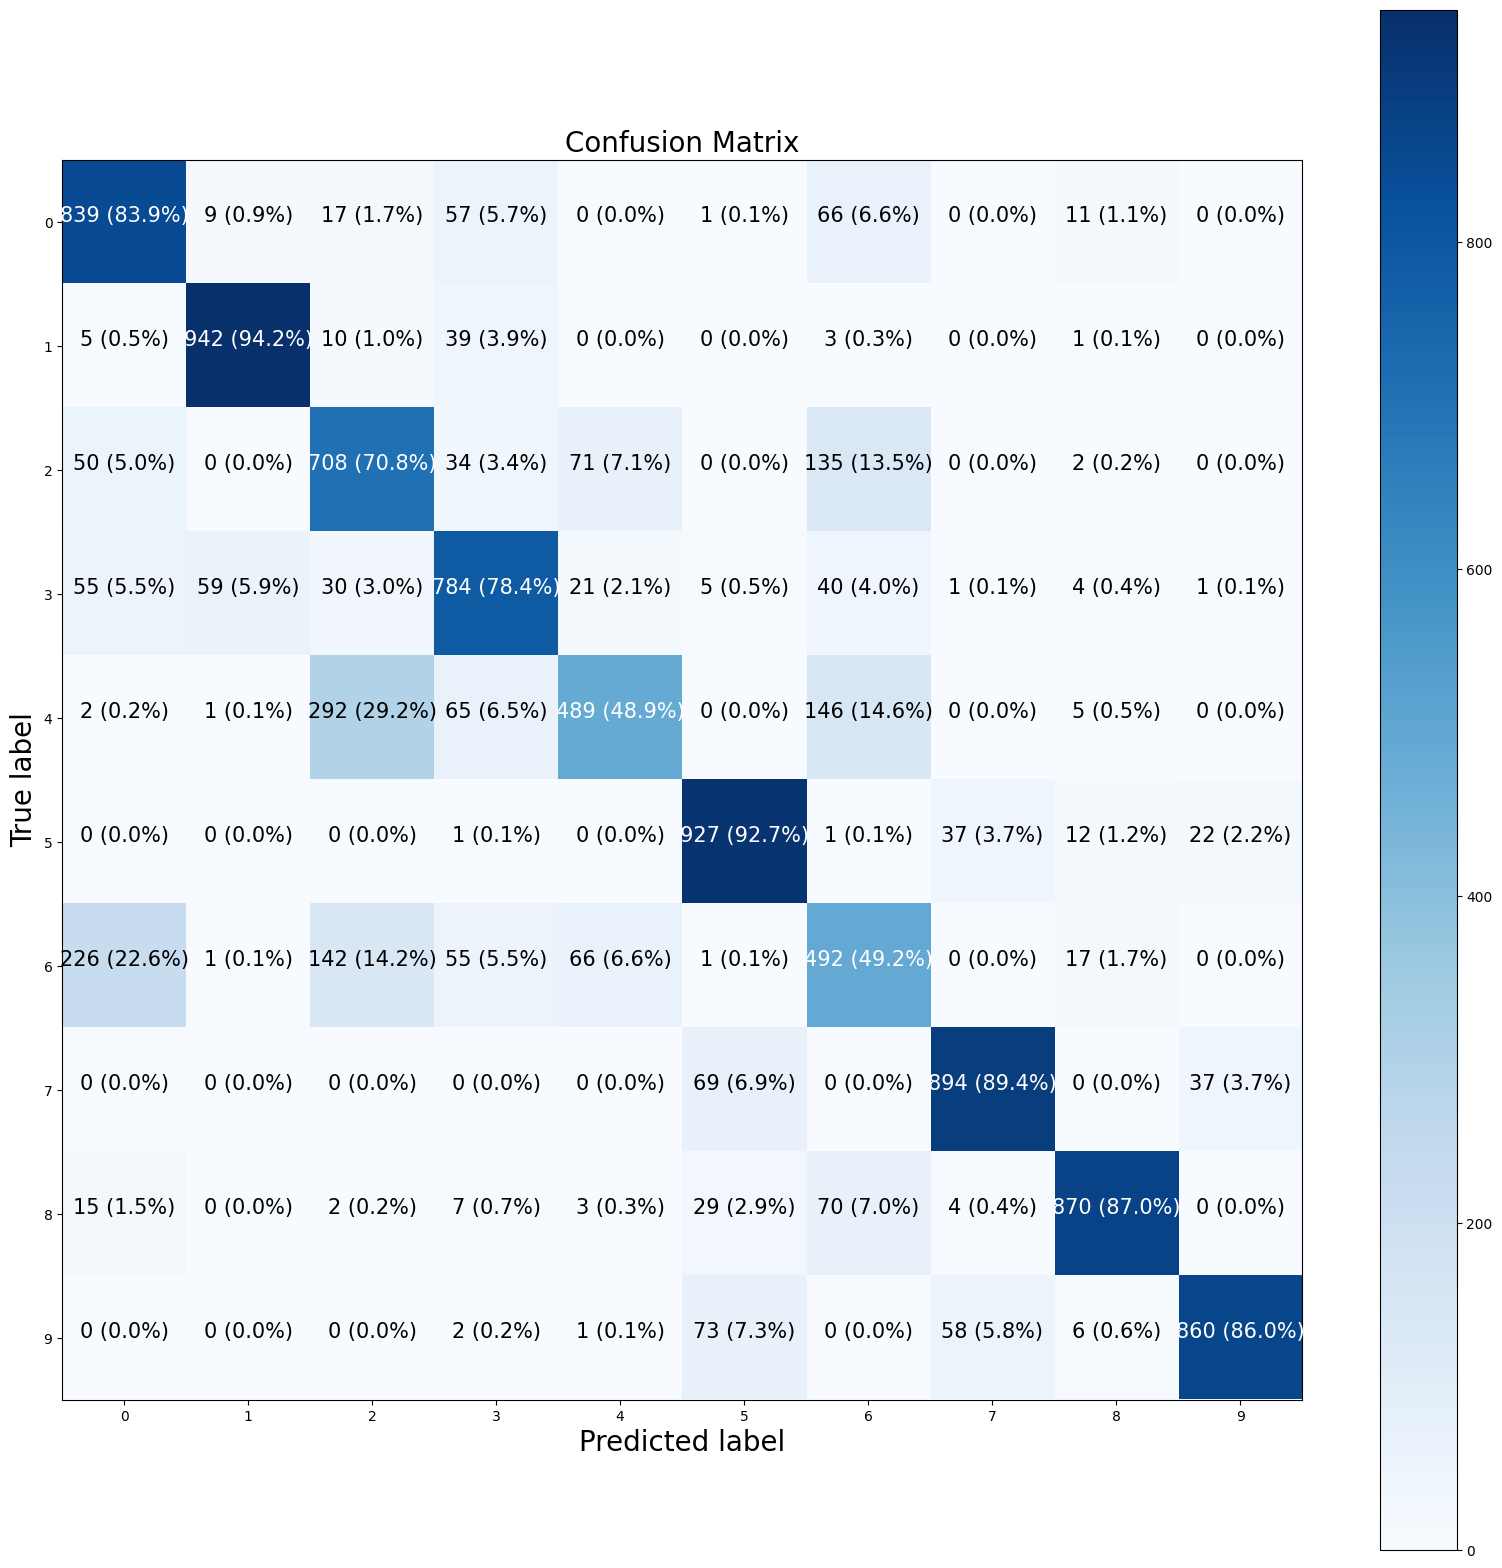

In [128]:
plot_confusion_matrix(test_labels,ypred_labelled,figsize=(20,20))